# Basic analysis with a single audio file

In [56]:
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join, getsize
import json
import itertools
import seaborn as sns
import librosa
import librosa.display

np.random.seed(37)
sns.set_style('whitegrid')

# Let's just load a file

In [2]:
fname = './mp3/100032.mp3'
y, sr = librosa.load(fname)

In [48]:
ipd.Audio(y, rate=sr)

In [50]:
duration = librosa.core.get_duration(y=y, sr=sr)
print('duration is {:.2f} seconds'.format(duration))

duration is 10.27 seconds


# Time domain plot of file

Text(0.5,1,'Time plot of file ./mp3/100032.mp3')

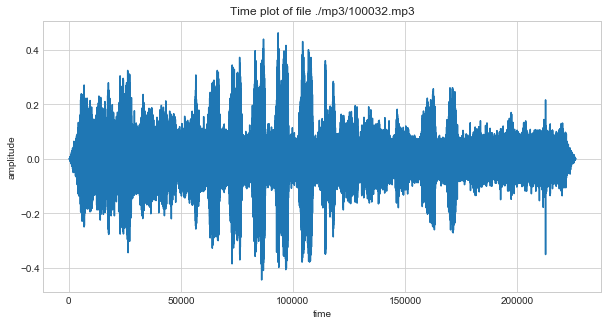

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y)
ax.set_ylabel('amplitude')
ax.set_xlabel('time')
ax.set_title('Time plot of file {}'.format(fname))

# Frequency domain plot of file

In [44]:
def get_fft(y, sr):
    Fs = float(sr)
    n = len(y)
    k = np.arange(n)
    T = n / Fs
    
    freq = k / T
    freq = freq[range(n / 2)]
    
    amp = np.fft.fft(y) / n
    amp = amp[range(n / 2)]
    
    return freq, amp

In [45]:
freq, amp = get_fft(y, sr)

Text(0.5,1,'Frequency domain plot of ./mp3/100032.mp3')

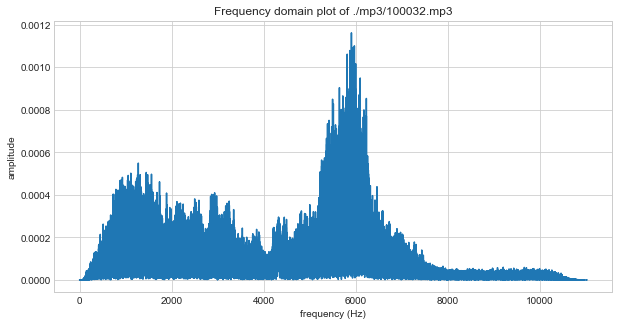

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, abs(amp))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('Frequency domain plot of {}'.format(fname))

# Spectrograms

[Spectrograms](https://en.wikipedia.org/wiki/Spectrogram) show the intensity of frequencies over time. 

* Short-time Fourier Transform
* Mel-spectrogram
* Constant-Q spectrogram

Text(0.5,1,'Power spectrogram')

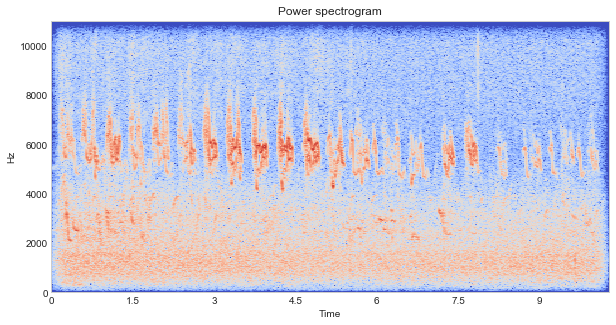

In [69]:
hop_length = 512
n_fft = 2048
X = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear', ax=ax)
ax.set_title('Power spectrogram')
# plt.colorbar(format='%+2.0f dB')

Text(0.5,1,'Mel-spectrogram')

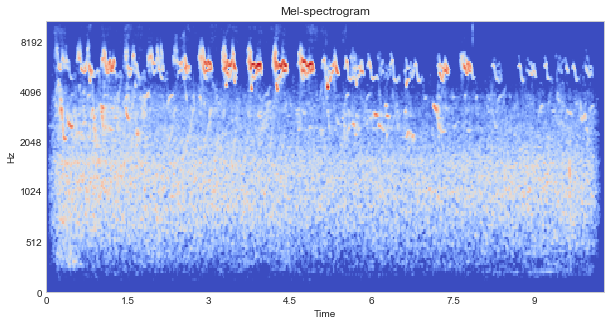

In [70]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512)
logS = librosa.amplitude_to_db(S)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel', ax=ax)
ax.set_title('Mel-spectrogram')

Text(0.5,1,'Constant-Q spectrogram')

<Figure size 1080x360 with 0 Axes>

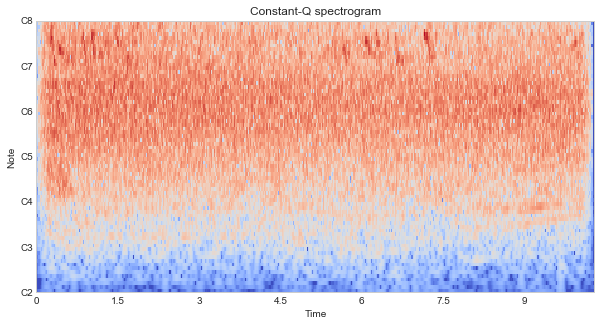

In [67]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))
plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm', ax=ax)
ax.set_title('Constant-Q spectrogram')

# References

* [Short-Time Fourier Transform](https://musicinformationretrieval.com/stft.html)
* [Stanford Music Information Retrieval](https://github.com/stevetjoa/stanford-mir)
* [Basic FFT Plot with Matplotlib](https://plot.ly/matplotlib/fft/)
* [Plotting a FFT in Python](https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python)
* [librosa 0.5.0.dev0 display not a module](https://github.com/librosa/librosa/issues/441)